In [1]:
import numpy as np
import sys 
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import plotly.express as px

In [2]:
def visual(name='sample.txt', prange=(200, 150, 100), skip=20):
    points = np.loadtxt(name)
#     print("x range: %d ~ %d"%(points[:,0].min(), points[:,0].max()))
#     print("y range: %d ~ %d"%(points[:,1].min(), points[:,1].max()))
#     print("z range: %d ~ %d"%(points[:,2].min(), points[:,2].max()))
    points = points[(np.abs(points[:,0])<=prange[0]) & (np.abs(points[:,1])<=prange[1]) & (np.abs(points[:,2])<=prange[2])]
    point_range = range(0, points.shape[0], skip) # skip points to prevent crash
    x = points[point_range, 0]
    y = points[point_range, 1]
    z = points[point_range, 2]
    fig = plt.figure(figsize=(10,10), dpi=100)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x,   # x
            y,   # y
            z,   # z
            s=0.1,
            c=z, # height data for color
            cmap='viridis',
            marker="o")
#     ax.axis('equal')  # {equal, scaled}
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('feature visulization')
    # ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(z)))  
    # ax.axis('off')          # 设置坐标轴不可见
    ax.grid(False)          # 设置背景网格不可见
    # plt.savefig('3D scatter plot.png')  #保存为图片
    plt.show()
    return 

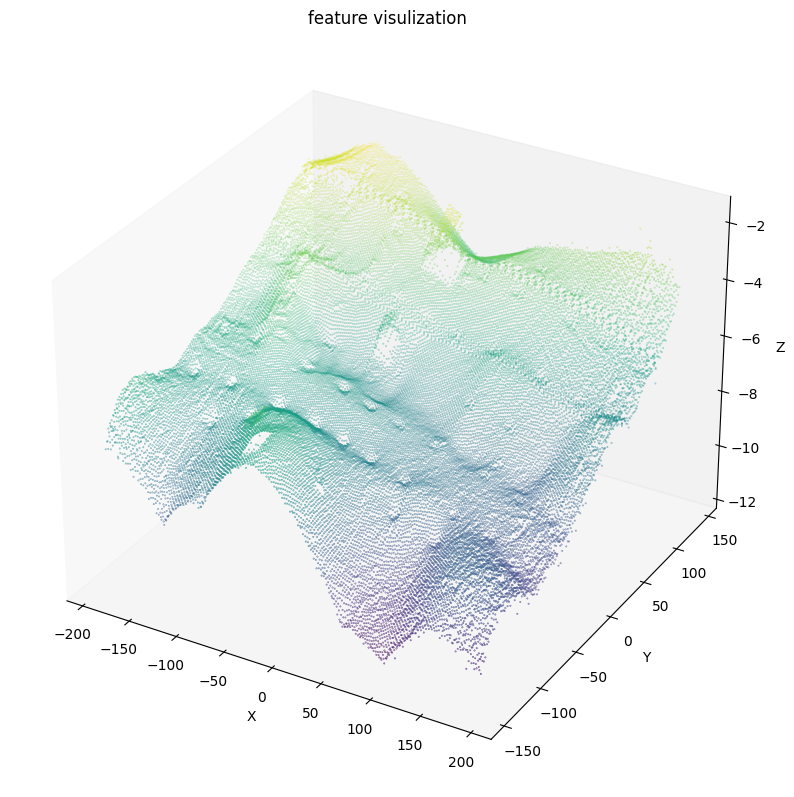

In [3]:
visual('..\stitch\SizectorS_PointCloudExport2', skip=20)

In [4]:
def getPoints(name, prange=(200, 150, 100), skip=20):
    print("read in " + name)
    points = np.loadtxt(name)
    print("x range: %d ~ %d"%(points[:,0].min(), points[:,0].max()))
    print("y range: %d ~ %d"%(points[:,1].min(), points[:,1].max()))
    print("z range: %d ~ %d"%(points[:,2].min(), points[:,2].max()))
    points = points[(np.abs(points[:,0])<=prange[0]) & (np.abs(points[:,1])<=prange[1]) & (np.abs(points[:,2])<=prange[2])]
    point_range = range(0, points.shape[0], skip) # skip points to prevent crash
    points = points[point_range]
    return points

In [5]:
def dynVisual(names=['sample.txt'], prange=(200, 150, 100), skip=20, zaugment=1):
    data = []
    for name in names:
        points = getPoints(name, prange, skip)
        x = points[:, 0]
        y = points[:, 1]
        z = points[:, 2]
    
        trace = go.Scatter3d(
            name=name,
            x=x,
            y=y,
            z=z,
            mode='markers',
            marker=dict(
                size=skip/10,
                color=z,                # set color to an array/list of desired values
                colorscale='Viridis',   # choose a colorscale
                opacity=1
            )
        )
        data.append(trace)

    layout = go.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
    )
    camera = dict(
        up=dict(x=1., y=0., z=1.),
        eye=dict(x=0., y=0., z=2.5)
    )

    
    fig = go.Figure(data=data, layout=layout)
    fig.update_layout(scene_camera=camera)
    fig.update_layout(legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    ))
    # fig.update_layout(
    # scene = dict(
    #     xaxis = dict(nticks=4, range=[-200,200],),
    #     yaxis = dict(nticks=4, range=[-150,150],),
    #     zaxis = dict(nticks=4, range=[-prange[2]/zaugment,prange[2]/zaugment],),),
    #     )
    fig.update_scenes(aspectmode='manual', aspectratio=dict(x=1, y=1, z=zaugment))
    # fig.update_layout(scene_aspectmode='manual', scene_aspectratio=dict(x=1, y=1, z=1))
    return fig


def addCloud(fig, names=['sample.txt'], prange=(200, 150, 100), skip=20):
    for name in names:
        points = getPoints(name, prange, skip)
        x = points[:, 0]
        y = points[:, 1]
        z = points[:, 2]
    
        trace = go.Scatter3d(
            name=name,
            x=x,
            y=y,
            z=z,
            mode='markers',
            marker=dict(
                size=skip/10,
                color=z,                # set color to an array/list of desired values
                colorscale='Viridis',   # choose a colorscale
                opacity=1
            )
        )
        fig.add_trace(trace)
    return fig

In [6]:
fig = dynVisual(names=["..\stitch\SizectorS_PointCloudExport1"], skip=20, zaugment=2)
fig = addCloud(fig, ["..\stitch\SizectorS_PointCloudExport2"], skip=20)
fig = addCloud(fig, ["..\stitch\SizectorS_PointCloudExport3"], skip=20)
fig.write_html("cloudpoint.html")
# fig.show()

read in ..\stitch\SizectorS_PointCloudExport1
x range: -193 ~ 194
y range: -149 ~ 142
z range: -198 ~ 188
read in ..\stitch\SizectorS_PointCloudExport2
x range: -190 ~ 191
y range: -146 ~ 141
z range: -11 ~ -1
read in ..\stitch\SizectorS_PointCloudExport3
x range: -188 ~ 190
y range: -144 ~ 140
z range: 0 ~ 14


In [8]:
fig = dynVisual(names=["..\glu\glue1", "..\glu\glue2"], skip=40, zaugment=2)
# fig = addCloud(fig, ["stitch\SizectorS_PointCloudExport2"], skip=20, zaugment=1)
# fig = addCloud(fig, ["stitch\SizectorS_PointCloudExport3"], skip=20, zaugment=1)
fig.write_html("cloudpointglue.html")

read in glu/glue1
x range: -192 ~ 195
y range: -146 ~ 147
z range: -86 ~ 107
read in glu/glue2
x range: -193 ~ 199
y range: -147 ~ 147
z range: -89 ~ 104
